# *MNIST_OCR*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow
from tensorflow.keras.utils import to_categorical
import keras
import random
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
train=pd.read_csv('/content/drive/MyDrive/mnist/train.csv')
test=pd.read_csv('/content/drive/MyDrive/mnist/test.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
len(train)

42000

In [5]:
y_train=train['label']
x_train=train.drop('label',axis=1)

In [6]:
x_train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [7]:
test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [8]:
x_train=x_train/255.0
test=test/255.0

In [9]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [10]:
y_train=to_categorical(y_train,num_classes=10)

In [11]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=2)

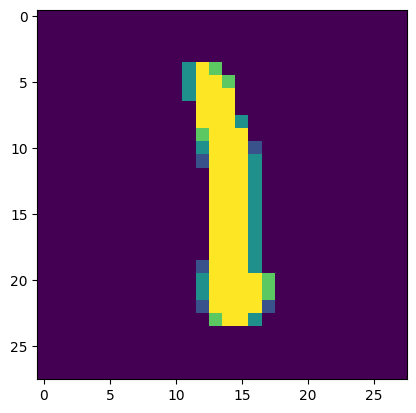

In [12]:
plt.imshow(x_train[5][:,:,0])

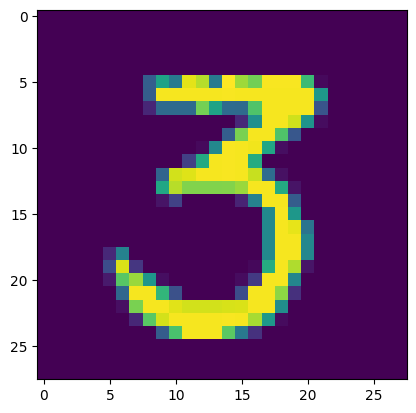

In [13]:
plt.imshow(x_train[3][:,:,0])

**Build Model**

In [14]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(4,4), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,batch_size=120,epochs=3,validation_data=(x_val,y_val))

Epoch 1/3
315/315 ━━━━━━━━━━━━━━━━━━━━ 213s 675ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 0.9924 - val_loss: 0.0272
Epoch 2/3
315/315 ━━━━━━━━━━━━━━━━━━━━ 211s 671ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9919 - val_loss: 0.0255
Epoch 3/3
315/315 ━━━━━━━━━━━━━━━━━━━━ 262s 671ms/step - accuracy: 0.9918 - loss: 0.0243 - val_accuracy: 0.9924 - val_loss: 0.0290


In [19]:
model.predict(np.reshape(x_val[0],[1,28,28,1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[2.7095600e-11, 1.0884010e-14, 7.3019885e-17, 5.6977441e-15,
        4.7619875e-15, 7.9867721e-09, 1.0000000e+00, 4.5318625e-19,
        2.9875453e-11, 1.8220257e-15]], dtype=float32)

In [20]:
def PredictImage(Image) :
  print(np.argmax(model.predict(np.reshape(Image,[1,28,28,1]))))
  plt.imshow(Image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6


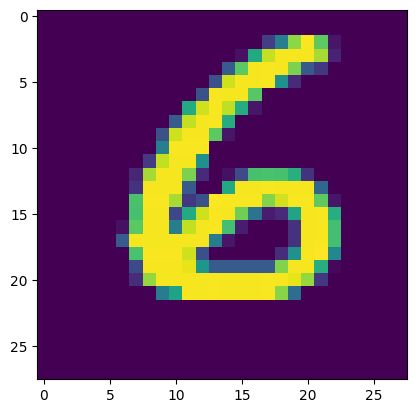

In [21]:
PredictImage(x_val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1


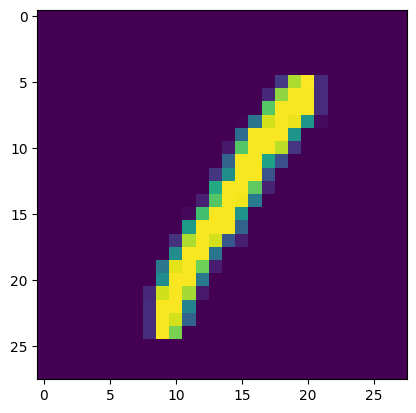

In [28]:
PredictImage(x_val[90])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3


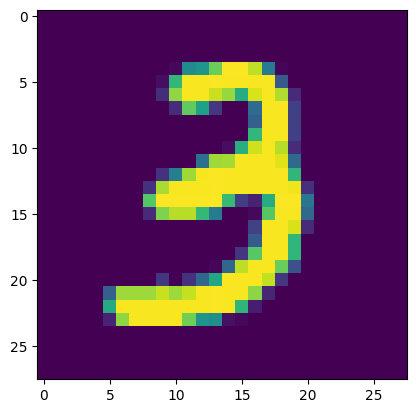

In [24]:
PredictImage(test[7])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5


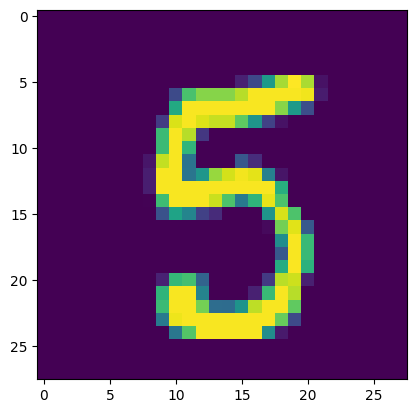

In [25]:
PredictImage(test[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
0


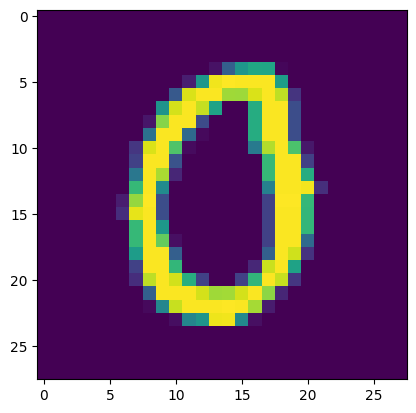

In [26]:
PredictImage(test[100])